# Performance Metrics Hands-On Exercise

This hands-on exercise encourages the utilization of different evaluation metrics using this dataset: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

Instructions:
 1. Fork the given repository
 2. Rename 'Exercise.ipynb' to '( lastname ).ipynb'
 3. Load the given dataset
 4. For No. 2-4, preprocess the dataset then construct, train, and evaluate a **classification** model (You may experiment in this step)
 5. For No. 5-7, preprocess the dataset then construct, train, and evaluate a **regression** model (You may experiment in this step)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

### 1. Load the Data

In [2]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 2. Preprocess the Data (Classification)

In [3]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_data = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                    'nursery', 'higher', 'internet', 'romantic']

for col in categorical_data:
    df[col] = label_encoder.fit_transform(df[col])

# Features and target variable
X_cls = df.drop(['G1', 'G2', 'G3'], axis=1)
y_cls = df['G3']

# Split the data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=1)

### 3. Construct and Train the Model (Classification)

In [4]:
# Train the model - Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train_cls, y_train_cls)

SVC(random_state=42)

### 4. Evaluate the Model (Classification)

SVM Classification Accuracy:  0.13924050632911392


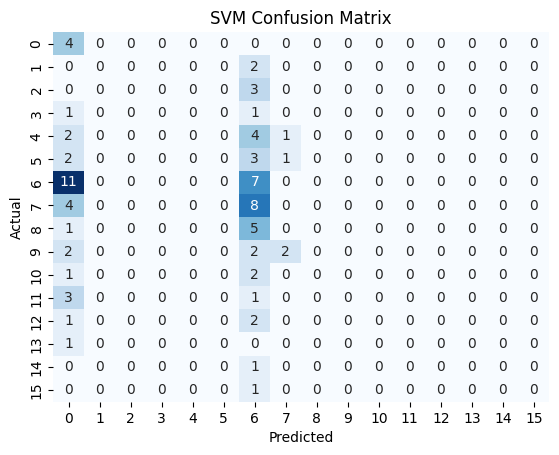

In [5]:
# Evaluate the model
y_pred_cls = svm.predict(X_test_cls)

# Accuracy
svm_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print('SVM Classification Accuracy: ',  svm_accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 5. Preprocess the Data (Regression)

In [6]:
# Features and target variable
X_reg = df.drop(['G1', 'G2', 'G3'], axis=1)
y_reg = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=1)

# Standardize
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train)
X_test_reg = scaler.transform(X_test)

### 6. Construct and Train the Model (Regression)

In [7]:
# Train the model - Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

LinearRegression()

### 7. Evaluate the Model (Regression)

In [8]:
# Evaluate the model
y_pred_red = lr.predict(X_test_reg)

# Mean Squared Error
lr_mse = mean_squared_error(y_test_reg, y_pred_red)
print('Linear Regression Mean Squared Error: ', lr_mse)

# Mean Absolute Error
lr_mae = mean_absolute_error(y_test_reg, y_pred_red)
print('Linear Regression Mean Absolute Error: ', lr_mae)

Linear Regression Mean Squared Error:  17.117672898690465
Linear Regression Mean Absolute Error:  3.2095728387166624
